In [1]:
import math
import numpy as np
import scipy.stats
from scipy import special
import pylab as plt
#import SDDlib as sdd
%matplotlib notebook
#import tqdm
plt.rcParams['figure.figsize'] = [8, 8]

In [2]:
#usefull constants
G = 6.67*10**(-8) #g^-1 cm^3 s^-2
h = 6.63*10**(-27) #erg s 
c = 2.99*10**(10) #cm s^-1
m_p = 1.67262192 * 10**(-24) #g
kb = 1.38 * 10**(-16) #erg/K
E_ion_hydrogen = 13.6 * 1.60218e-12
E_Ly_alpha = 10.2 * 1.60218e-12
E_Ly_beta = 12.1 * 1.60218e-12
n_0 = 2*10**(-7) #cm^-3
delta = 200 #overdensity
f_baryon = 0.15 #fraction of baryonic matter over total matter
mu = 1 #only hydrogen
solar_mass = 1.989*10**(33)

g_ff = 1
g_B = 1










In [3]:
v = np.linspace (0, 10**(18), 1000000)

In [4]:
def eps_brems_spectrum(T, Z, ne, ni):
    return 6.8 * 10**(-38) * Z**2 * ne * ni * T**(-1/2) * np.exp(-h*v/(kb*T)) * g_ff

def eps_brems_int(T, Z, ne, ni):
    return 1.4 * 10**(-27) * Z**2 * ne * ni * T**(1/2) * g_B

def bbody(T):
    return (2 * h * v**3 / c**2)/(np.exp(h*v/(kb*T))-1)

In [ ]:
plt.plot(v, eps_brems_spectrum(10**4, 1, 10**10, 10**10), label="T=10^4 K")
plt.plot(v, eps_brems_spectrum(10**5, 1, 10**10, 10**10), label="T=10^5 K")
plt.plot(v, eps_brems_spectrum(10**6, 1, 10**10, 10**10), label="T=10^6 K")
plt.plot(v, eps_brems_spectrum(10**7, 1, 10**10, 10**10), label="T=10^7 K")

#print(brems_spectra(10**4, 1, 10^(10), 10^(10)))

plt.xscale("log")
plt.yscale("log")
plt.xlabel("v[Hz]")
plt.ylabel("emissivity [erg s^-1 cm^-3]")
plt.ylim(10**(-22), 10**(-19))
plt.title("Thermal Bremsstrahlung Spectra")
plt.legend()
plt.grid()
plt.show()

plt.fill_between(v,bbody(10**7), where= (10**12 < v)&(v < 0.4*10**15), color= "red", alpha= 0.1)
plt.fill_between(v,bbody(10**7), where= (0.4*10**15 < v)&(v < 0.7*10**15), color= "g", alpha= 0.3)
plt.fill_between(v,bbody(10**7), where= (0.7*10**15 < v)&(v < 10**17), color= "purple", alpha= 0.1)
plt.fill_between(v,bbody(10**7), where= (10**17 < v)&(v < 10**19), color= "yellow", alpha= 0.2)

/tmp/ipykernel_3821/4160242832.py:8: RuntimeWarning: overflow encountered in exp
  return (2 * h * v**3 / c**2)/(np.exp(h*v/(kb*T))-1)
/tmp/ipykernel_3821/4160242832.py:8: RuntimeWarning: invalid value encountered in divide
  return (2 * h * v**3 / c**2)/(np.exp(h*v/(kb*T))-1)


<IPython.core.display.Javascript object>


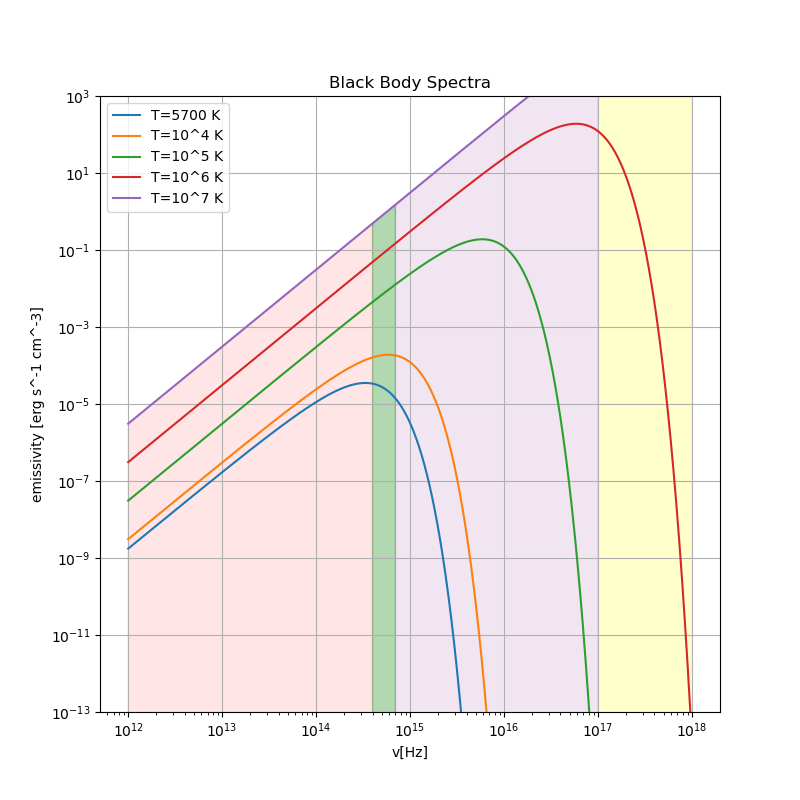

In [14]:
plt.plot(v, bbody(5700), label="T=5700 K")
plt.plot(v, bbody(10**4), label="T=10^4 K")
plt.plot(v, bbody(10**5), label="T=10^5 K")
plt.plot(v, bbody(10**6), label="T=10^6 K")
plt.plot(v, bbody(10**7), label="T=10^7 K")

#print(brems_spectra(10**4, 1, 10^(10), 10^(10)))

plt.xscale("log")
plt.yscale("log")
plt.xlabel("v[Hz]")
plt.ylabel("emissivity [erg s^-1 cm^-3]")
plt.ylim(10**(-13), 10**(3))
plt.title("Black Body Spectra")
plt.legend()
plt.grid()
plt.show()

plt.fill_between(v,bbody(10**7), where= (10**12 < v)&(v < 0.4*10**15), color= "red", alpha= 0.1)
plt.fill_between(v,bbody(10**7), where= (0.4*10**15 < v)&(v < 0.7*10**15), color= "g", alpha= 0.3)
plt.fill_between(v,bbody(10**7), where= (0.7*10**15 < v)&(v < 10**17), color= "purple", alpha= 0.1)
plt.fill_between(v,bbody(10**7), where= (10**17 < v)&(v < 10**19), color= "yellow", alpha= 0.2)

In [5]:
def alpha_ff(T, Z, ne, ni):
    return 3.7*10**8 * T**(-1/2) * Z**2 * ne * ni * v**(-3) * (1-np.exp(-h*v/(kb*T))) * g_ff 

R = 10**15 #cm. Cloud size, comparable to solar system (Ghisellini) Uniform absorption 

def I(T, Z, ne, ni, I_0, R):
    return bbody(T) + np.exp(-alpha_ff(T, Z, ne, ni)*R) * (I_0 - bbody(T))




/tmp/ipykernel_5618/4160242832.py:8: RuntimeWarning: invalid value encountered in divide
  return (2 * h * v**3 / c**2)/(np.exp(h*v/(kb*T))-1)
/tmp/ipykernel_5618/2252818110.py:2: RuntimeWarning: divide by zero encountered in power
  return 3.7*10**8 * T**(-1/2) * Z**2 * ne * ni * v**(-3) * (1-np.exp(-h*v/(kb*T))) * g_ff
/tmp/ipykernel_5618/2252818110.py:2: RuntimeWarning: invalid value encountered in multiply
  return 3.7*10**8 * T**(-1/2) * Z**2 * ne * ni * v**(-3) * (1-np.exp(-h*v/(kb*T))) * g_ff


<IPython.core.display.Javascript object>


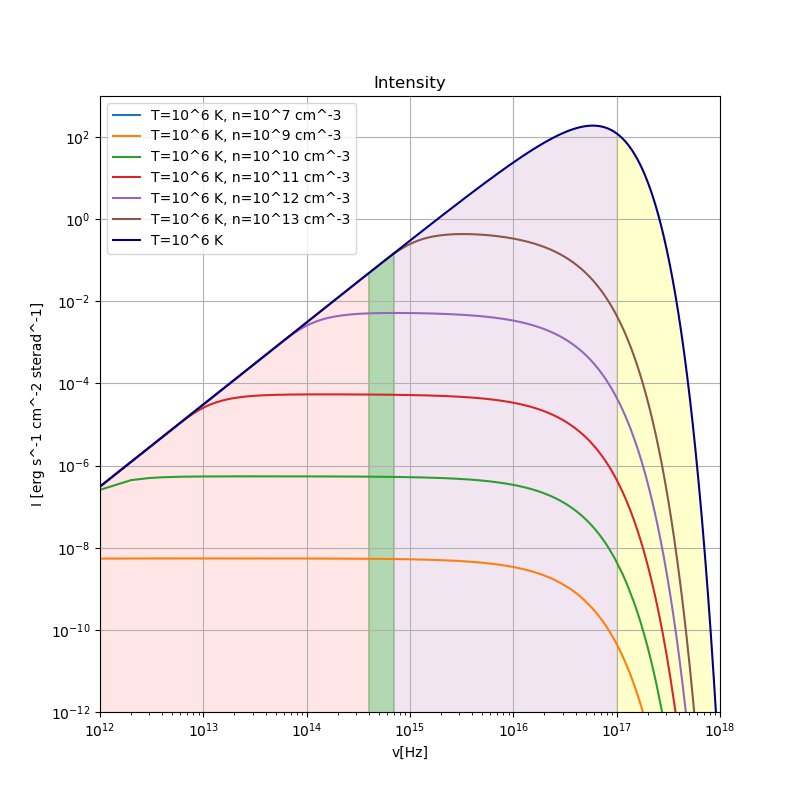

In [9]:
plt.plot(v, I(10**6, 1, 10**7, 10**7, 0, R), label="T=10^6 K, n=10^7 cm^-3")
plt.plot(v, I(10**6, 1, 10**9, 10**9, 0, R), label="T=10^6 K, n=10^9 cm^-3")
plt.plot(v, I(10**6, 1, 10**10, 10**10, 0, R), label="T=10^6 K, n=10^10 cm^-3")
plt.plot(v, I(10**6, 1, 10**11, 10**11, 0, R), label="T=10^6 K, n=10^11 cm^-3")
plt.plot(v, I(10**6, 1, 10**12, 10**12, 0, R), label="T=10^6 K, n=10^12 cm^-3")
plt.plot(v, I(10**6, 1, 10**13, 10**13, 0, R), label="T=10^6 K, n=10^13 cm^-3")
plt.plot(v, bbody(10**6), label="T=10^6 K", color = "navy")

plt.xscale("log")
plt.yscale("log")
plt.xlabel("v[Hz]")
plt.ylabel("I [erg s^-1 cm^-2 sterad^-1]")
plt.xlim(10**12, 10**18)
plt.ylim(10**-12, 10**3)
plt.title("Intensity")
plt.legend()
plt.grid()
plt.show()

plt.fill_between(v,bbody(10**6), where= (10**12 < v)&(v < 0.4*10**15), color= "red", alpha= 0.1)
plt.fill_between(v,bbody(10**6), where= (0.4*10**15 < v)&(v < 0.7*10**15), color= "g", alpha= 0.3)
plt.fill_between(v,bbody(10**6), where= (0.7*10**15 < v)&(v < 10**17), color= "purple", alpha= 0.1)
plt.fill_between(v,bbody(10**6), where= (10**17 < v)&(v < 10**19), color= "yellow", alpha= 0.2)